# Processo seletivo Estágio em Data Science - Scicrop

# Modelo de machine learning  classificação.

**Rafael Henrique Gallo**

Modelo de machine learning um classificador.
Nesse modelo a empresa Scicrop disponibilizou os datasets de saúde e qualidade de colheitas das safras.

Modelo é determinar o resultado da safra atual de 2020 ou se a colheita será saudável ou prejudicada por injetos e pesticidas, ou ser prejudicada por outros elementos.

**Estatística Descritiva**

Usando a estatística descritiva para tirar média, mediana, moda dos dados.

**3 classes**

1 - Colheita sofreu dano por pesticidas.

2 - Uma colheita saudável.

3 - Se a colheita sofreu motivos diversos.

**Algortimo usados**

**K-NN**

**Naive bayes** 

**Random Forest**

**Bibliotecas usadas**

**Pandas**

**Numpy**

**Matplotlib**

**Seaborn**

**Sklearn**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Dados carregados do dataset

df_train = pd.read_csv("Safra_2018-2019.csv")
df_prev = pd.read_csv("Safra_2020.csv")

In [3]:
#visualizando os dados e numeros de dados

df_train.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1


In [4]:
df_prev.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,80000,SCROP80001,256,0,1,2,35,11.0,9,1
1,80001,SCROP80002,283,0,1,2,5,5.0,6,1
2,80002,SCROP80003,283,0,1,2,15,15.0,5,2
3,80003,SCROP80004,283,0,1,2,15,NaN,7,2
4,80004,SCROP80005,283,0,1,2,15,19.0,2,1


**Limpeza de dados**

In [5]:
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8858 entries, 0 to 8857
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                8858 non-null   int64  
 1   Identificador_Agricultor  8858 non-null   object 
 2   Estimativa_de_Insetos     8858 non-null   int64  
 3   Tipo_de_Cultivo           8858 non-null   int64  
 4   Tipo_de_Solo              8858 non-null   int64  
 5   Categoria_Pesticida       8858 non-null   int64  
 6   Doses_Semana              8858 non-null   int64  
 7   Semanas_Utilizando        7913 non-null   float64
 8   Semanas_Sem_Uso           8858 non-null   int64  
 9   Temporada                 8858 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 692.2+ KB


In [6]:
df_prev.isnull().sum()

Unnamed: 0                    0
Identificador_Agricultor      0
Estimativa_de_Insetos         0
Tipo_de_Cultivo               0
Tipo_de_Solo                  0
Categoria_Pesticida           0
Doses_Semana                  0
Semanas_Utilizando          945
Semanas_Sem_Uso               0
Temporada                     0
dtype: int64

In [7]:
#Excluindo o coluna

df_prev.drop("Identificador_Agricultor", inplace = True, axis = 1)

In [8]:
df_train = df_train.fillna(0)

In [9]:
df_prev = df_prev.fillna(0)

In [10]:
# Features visualizados
df_prev.head()

,Unnamed: 0,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,80000,256,0,1,2,35,11.0,9,1
1,80001,283,0,1,2,5,5.0,6,1
2,80002,283,0,1,2,15,15.0,5,2
3,80003,283,0,1,2,15,0.0,7,2
4,80004,283,0,1,2,15,19.0,2,1


# Estatistica ver a média, mediana, moda, desvio padrão da safra

**Dados a média, mediana, moda da safra**

In [11]:
df_train.describe()

,Unnamed: 0,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,39999.500000,1400.020875,0.283338,0.455550,2.267587,25.846750,25.778325,9.549088,1.897575,0.192312
std,23094.155105,849.792471,0.450622,0.498023,0.463748,15.557246,14.602460,9.905547,0.702079,0.455912
min,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,19999.750000,731.000000,0.000000,0.000000,2.000000,15.000000,16.000000,0.000000,1.000000,0.000000
50%,39999.500000,1212.000000,0.000000,0.000000,2.000000,20.000000,26.000000,7.000000,2.000000,0.000000
75%,59999.250000,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,79999.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [12]:
df_prev.describe()

,Unnamed: 0,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
count,8858.000000,8858.000000,8858.000000,8858.000000,8858.000000,8858.000000,8858.000000,8858.000000,8858.000000
mean,84428.500000,1389.902574,0.293746,0.484308,2.233461,25.878867,25.241251,9.959359,1.891398
std,2557.228676,842.295394,0.455503,0.499782,0.442366,15.529796,14.371070,9.848986,0.694461
min,80000.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,82214.250000,731.000000,0.000000,0.000000,2.000000,15.000000,16.000000,0.000000,1.000000
50%,84428.500000,1212.000000,0.000000,0.000000,2.000000,20.000000,25.000000,8.000000,2.000000
75%,86642.750000,1898.000000,1.000000,1.000000,2.000000,40.000000,35.000000,16.000000,2.000000
max,88857.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


In [13]:
# Média

media_geral = df_prev.Estimativa_de_Insetos.mean()
print("A média geral é de {}".format(media_geral))

A média geral é de 1389.902573944457


In [14]:
#Mediana

mediana = df_prev.Estimativa_de_Insetos.median()
print("A mediana geral é de {}". format(mediana))

A mediana geral é de 1212.0


In [15]:
#Moda

moda = df_prev.Estimativa_de_Insetos.mode()
print("A moda geral é de {}". format(moda))

A moda geral é de 0    1212
dtype: int64


In [16]:
#Desvio padrao

desvio_padrao = df_prev.Estimativa_de_Insetos.std()
print("O desvio padrão é de {}". format(desvio_padrao))

O desvio padrão é de 842.2953943375776


**Dados de correlação**

**Covariância é uma medida numérica que indica a inter-dependência entre duas variáveis se comportam conjuntamente em relação as médias são totalmente independentes que uma covariância alta e positiva que indica variável é grande.
Quando uma covariância e negativa com valor absoluto alto indica que uma variavel é pequena quando a outra é grande.**

In [17]:
print(df_prev.corr())

                       Unnamed: 0  Estimativa_de_Insetos  Tipo_de_Cultivo  \
Unnamed: 0               1.000000               0.076178         0.038461   
Estimativa_de_Insetos    0.076178               1.000000        -0.077514   
Tipo_de_Cultivo          0.038461              -0.077514         1.000000   
Tipo_de_Solo            -0.082679              -0.057919        -0.365603   
Categoria_Pesticida     -0.056800              -0.073074         0.209861   
Doses_Semana            -0.013689              -0.108416        -0.203690   
Semanas_Utilizando       0.013415               0.321162        -0.024522   
Semanas_Sem_Uso          0.057247               0.303924        -0.211736   
Temporada               -0.009782              -0.003878        -0.003361   

                       Tipo_de_Solo  Categoria_Pesticida  Doses_Semana  \
Unnamed: 0                -0.082679            -0.056800     -0.013689   
Estimativa_de_Insetos     -0.057919            -0.073074     -0.108416   
Tipo_de

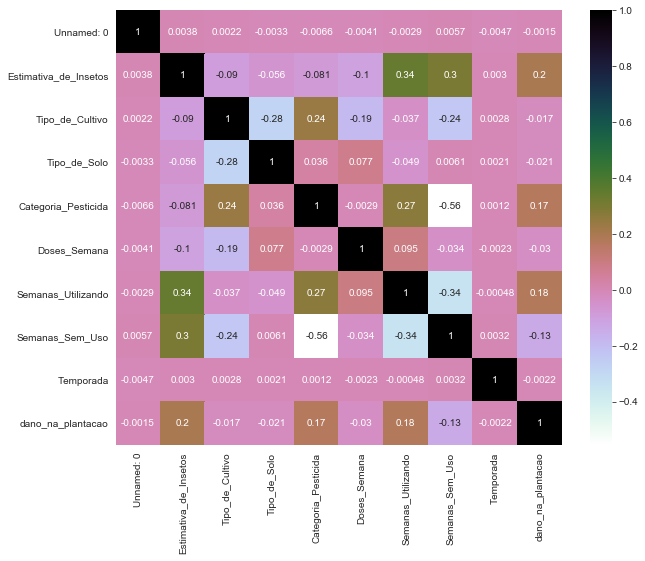

In [18]:
plt.figure(figsize=(10,8))

sns.heatmap(df_train.corr(), annot = True,cmap = 'cubehelix_r')
plt.show()

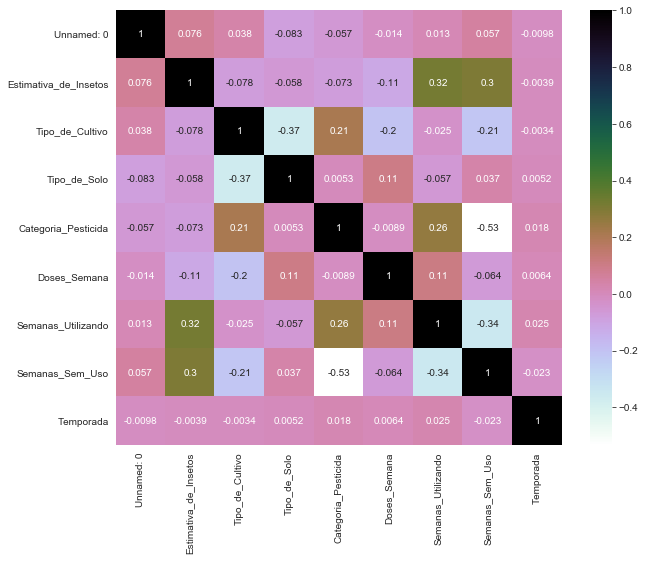

In [19]:
plt.figure(figsize=(10,8))

sns.heatmap(df_prev.corr(), annot = True,cmap = 'cubehelix_r')
plt.show()

# Análise exploratória de dados da safra 2020

**Usando a análise exploratória para sabe os valores da safra e os dados.**

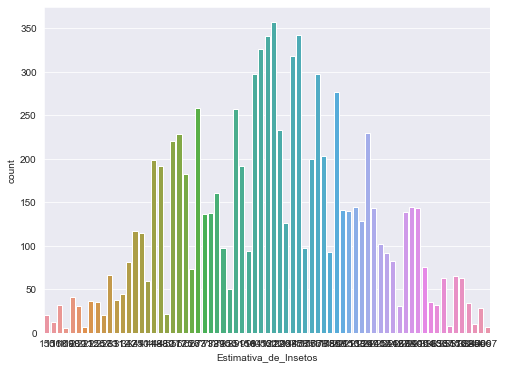

In [20]:
df = plt.figure(figsize=(8, 6))

sns.countplot(x="Estimativa_de_Insetos", data=df_prev)

Text(0.5, 1.0, 'Safra')

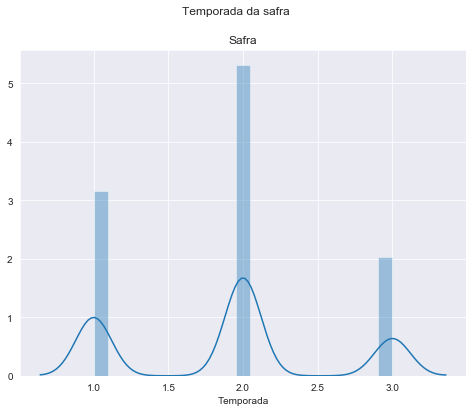

In [21]:
df = plt.figure(figsize=(8, 6))

x1 = sns.distplot(df_prev['Temporada'], kde=True)
x1.figure.suptitle('Temporada da safra')
x1.set_title('Safra')

Text(0.5, 1.0, 'Safra')

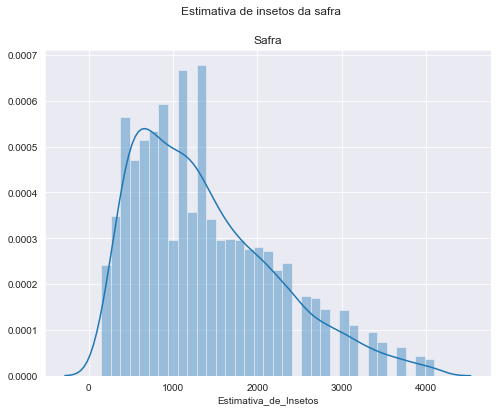

In [22]:
df = plt.figure(figsize=(8, 6))

x2 = sns.distplot(df_prev['Estimativa_de_Insetos'], kde = True)
x2.figure.suptitle('Estimativa de insetos da safra')
x2.set_title('Safra')

Text(0.5, 1.0, 'Safra')

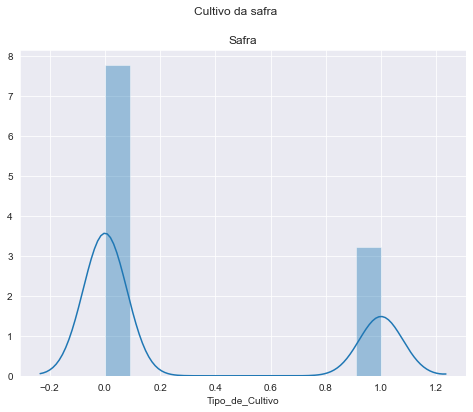

In [23]:
df = plt.figure(figsize=(8, 6))

x3 = sns.distplot(df_prev["Tipo_de_Cultivo"], kde = True)
x3.figure.suptitle('Cultivo da safra')
x3.set_title('Safra')

Text(0.5, 1.0, 'Pesticida')

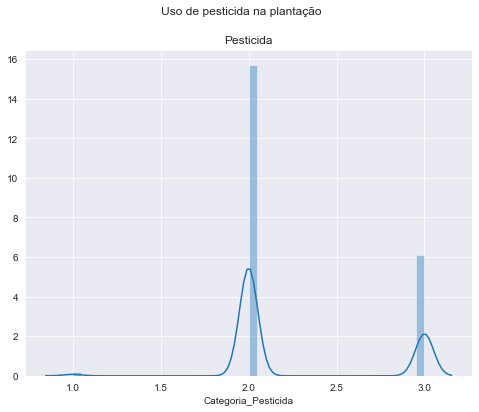

In [24]:
df = plt.figure(figsize=(8, 6))

x4 = sns.distplot(df_train["Categoria_Pesticida"], kde = True)
x4.figure.suptitle("Uso de pesticida na plantação")
x4.set_title("Pesticida")

Text(0.5, 1.0, 'Cultivo')

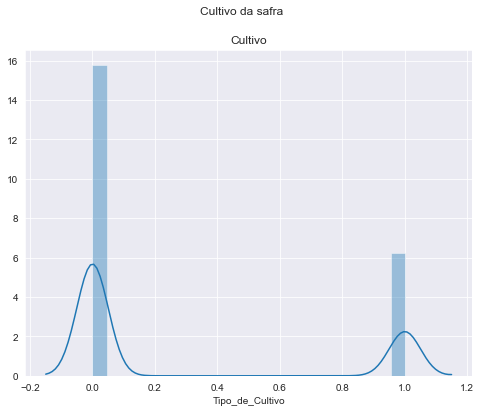

In [25]:
df = plt.figure(figsize=(8, 6))

x5 = sns.distplot(df_train["Tipo_de_Cultivo"], kde = True)
x5.figure.suptitle("Cultivo da safra")
x5.set_title("Cultivo")

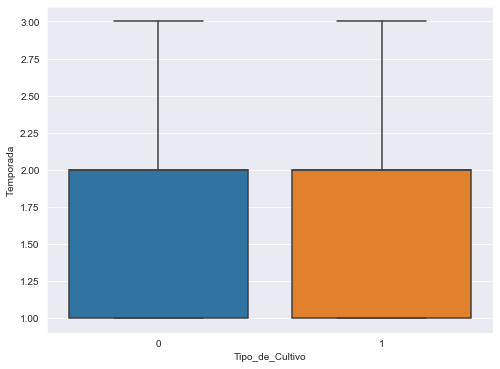

In [26]:
df = plt.figure(figsize=(8, 6))

sns.boxplot(x="Tipo_de_Cultivo", y="Temporada", data=df_train)

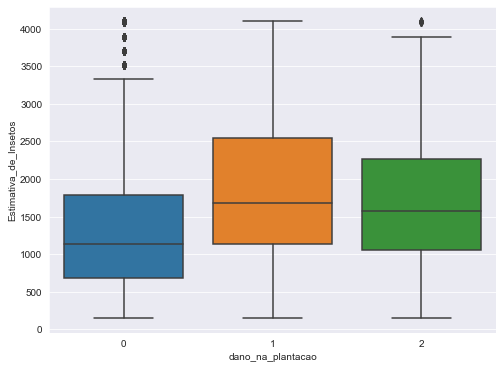

In [27]:
df = plt.figure(figsize=(8, 6))

sns.boxplot(x="dano_na_plantacao", y="Estimativa_de_Insetos", data=df_train)

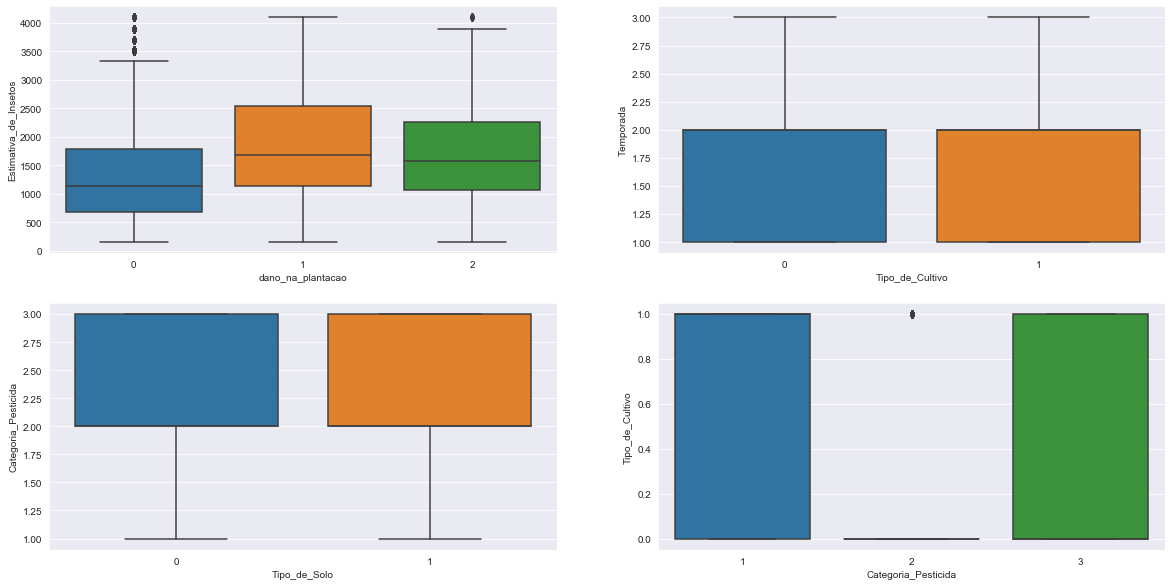

In [28]:
df = plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
df = sns.boxplot(x="dano_na_plantacao", y="Estimativa_de_Insetos", data=df_train)
plt.subplot(2,2,2)
df = sns.boxplot(x="Tipo_de_Cultivo", y="Temporada", data=df_train)
plt.subplot(2,2,3)
df = sns.boxplot(x="Tipo_de_Solo", y="Categoria_Pesticida", data=df_train)
plt.subplot(2,2,4)
df = sns.boxplot(x="Categoria_Pesticida", y="Tipo_de_Cultivo", data=df_train)

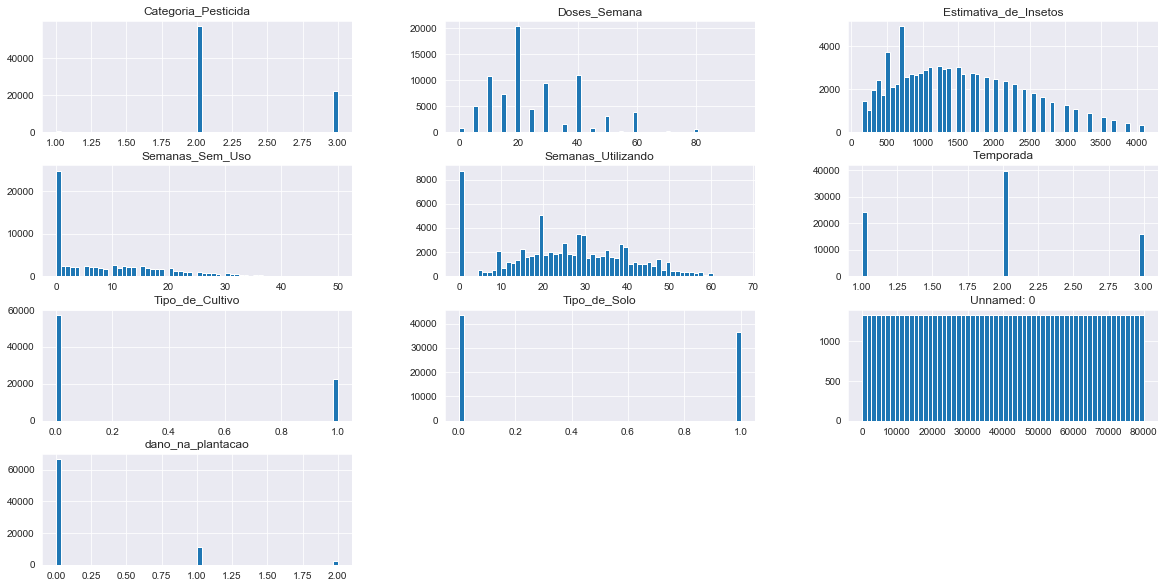

In [29]:
df_train.hist(bins = 60, figsize=(20, 10))
plt.show()

# Modelo machine learning

**Classificação de algoritmos para sabe qual o melhor algoritmo para o dataset da safra depois fazer a previsão da safra.**

In [30]:
#Features e separando para treino

train = df_prev.iloc[:, 1:4].values
test = df_prev.iloc[:, 4].values

In [31]:
#Treino teste do modelo para treinar o modelo 

from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(train, test)

In [32]:
#Algoritmo Naive bayes
#valor da acuracia do modelo de naive_bayes
from sklearn import metrics
from sklearn import neighbors 
from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()
naive = neighbors.KNeighborsClassifier(n_neighbors = 8)
naive.fit(X_train, y_train)
naive_prev = naive.predict(x_test)
print(naive_prev)
print("Acurácia Naive bayes:",metrics.accuracy_score(y_test, naive_prev))

[2 2 3 ... 2 2 2]
Acurácia Naive bayes: 0.7860045146726863


In [33]:
#Algoritmo K-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 31, metric = "minkowski", p = 2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(x_test)
print(knn_pred)
print("Acurácia K-NN:",metrics.accuracy_score(y_test, knn_pred))

[2 2 2 ... 2 2 2]
Acurácia K-NN: 0.7616252821670428


In [34]:
#Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier

Random = RandomForestClassifier(n_estimators = 250, random_state = 10)
Random.fit(X_train, y_train)
Random_predict = Random.predict(x_test)
print(Random_predict)
print("Acurácia random forest:",metrics.accuracy_score(y_test, Random_predict))

[2 2 3 ... 2 2 2]
Acurácia random forest: 0.7972911963882618


In [35]:
#valor da acuracia 
# Valor da matrix de confussão

from sklearn.metrics import confusion_matrix, accuracy_score

acurácia_naive_bayes = accuracy_score(y_test, naive_prev)
acurácia_KNN = accuracy_score(y_test, knn_pred)
acurácia_Random = accuracy_score(y_test, Random_predict)

matrix_naive_bayes = confusion_matrix(y_test, naive_prev)
matrix_KNN = confusion_matrix(y_test, knn_pred)
matrix_Random = confusion_matrix(y_test, Random_predict)

print("Acurácia Naive bayes: %.2f" % (acurácia_naive_bayes * 100))
print("Acurácia K-NN: %.2f" % (acurácia_KNN * 100))
print("Acurácia Random Forest: %.2f" % (acurácia_Random * 100))

Acurácia Naive bayes: 78.60
Acurácia K-NN: 76.16
Acurácia Random Forest: 79.73


**Graficos da matriz de Confusão**

Classificaçao do Naive Bayes 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.79      0.98      0.87      1661
           3       0.76      0.21      0.33       530

    accuracy                           0.79      2215
   macro avg       0.51      0.40      0.40      2215
weighted avg       0.77      0.79      0.73      2215



C:\Users\RafaelHenriqueGallo\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


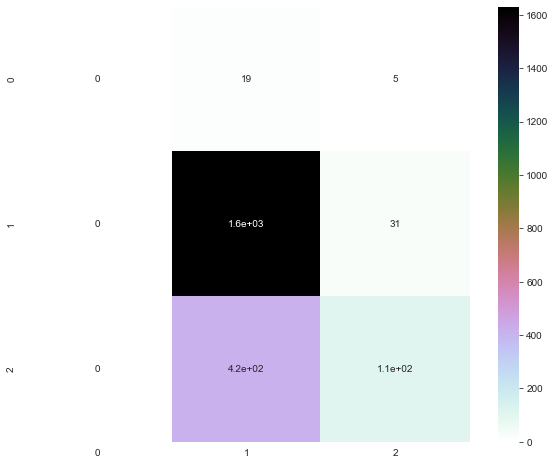

In [36]:
#Classificação de algoritmos K-NN, Naive bayes, Random florest.

from sklearn.metrics import confusion_matrix,classification_report

plt.figure(figsize=(10,8))
matrix = classification_report(y_test, naive_prev)
print("Classificaçao do Naive Bayes \n", matrix)

sns.heatmap(matrix_naive_bayes, annot = True,cmap = 'cubehelix_r')
plt.show()

Classificaçao do  K-NN 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.77      0.98      0.86      1661
           3       0.64      0.11      0.18       530

    accuracy                           0.76      2215
   macro avg       0.47      0.36      0.35      2215
weighted avg       0.73      0.76      0.69      2215



C:\Users\RafaelHenriqueGallo\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


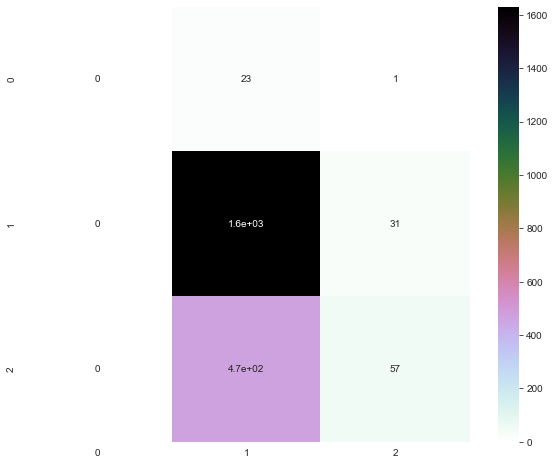

In [37]:
plt.figure(figsize=(10,8))
matrix = classification_report(y_test, knn_pred)
print("Classificaçao do  K-NN \n", matrix)

sns.heatmap(matrix_KNN, annot = True,cmap = 'cubehelix_r')
plt.show()

Classificaçao do Random Forest 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        24
           2       0.80      0.99      0.88      1661
           3       0.83      0.24      0.37       530

    accuracy                           0.80      2215
   macro avg       0.54      0.41      0.42      2215
weighted avg       0.79      0.80      0.75      2215



C:\Users\RafaelHenriqueGallo\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


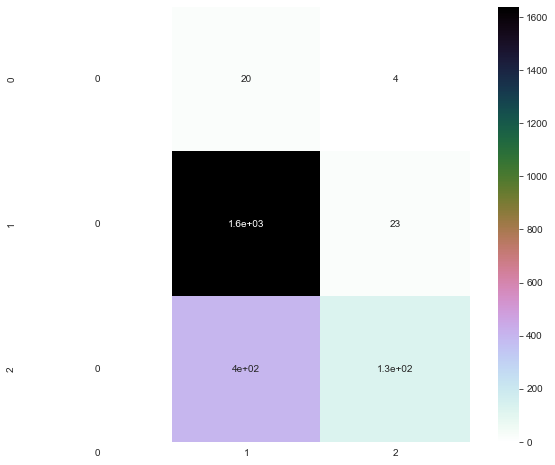

In [38]:
plt.figure(figsize=(10,8))

sns.heatmap(matrix_Random, annot = True,cmap = 'cubehelix_r')
matrix = classification_report(y_test, Random_predict)
print("Classificaçao do Random Forest \n", matrix)
plt.show()

# **Resultado o melhor algoritmo**

**Neste classificador foi usado três algoritmos usados foi K-NN, Naive bayes, Random forest.
O melhor algoritmo foi o Random forest neste classificador, que teve uma acurácia de 80% bom nesse modelo era para ver quais do algoritmos que se comportar melhor foi três algoritmos usados Naive bayes, K-NN, Random forest.
Bom melhor foi o Random forest.**